## Let's use the dataset and apply machine learning algorithm to understand which parameters can help us determine the quality of wine. The dataset contains red and white wine.

In [1]:
# Import all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from termcolor import colored

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC


In [2]:
# Start reading the data set
import glob
file= glob.glob('data/*.csv')
df = pd.concat((pd.read_csv(f, sep=';') for f in file), ignore_index=True)
# Drop rows with NaN in the 'quality' column
df.dropna(subset=['quality'], inplace=True)
df.shape[0]

6497

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
print("\nThe number of rows and columns are: ", df.shape)
print("\n No of features are: ", df.columns.to_list())
print("\n Missing values are: ", df.isnull().sum().values.sum())
print("Unique values are : \n", df.nunique())
print("Here are the list of values for all columns \n")
for col in df.columns:
  print(df[col].value_counts())


The number of rows and columns are:  (6497, 12)

 No of features are:  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

 Missing values are:  0
Unique values are : 
 fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
dtype: int64
Here are the list of values for all columns 

fixed acidity
6.8     354
6.6     327
6.4     305
7.0     282
6.9     279
       ... 
13.8      1
14.0      1
14.3      1
15.9      1
12.1      1
Name: count, Length: 106, dtype: int64
volatile acidity
0.280    286
0.240    266
0.260    256
0.250    238
0.220    235
        ... 
1.115      1
1.580     

In [5]:
df.rename(columns = {'fixed acidity':'fixed_acidity', 'volatile acidity':'volatile_acidity', 'citric acid':'citric_acid', 'residual sugar':'residual_sugar', 'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [6]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

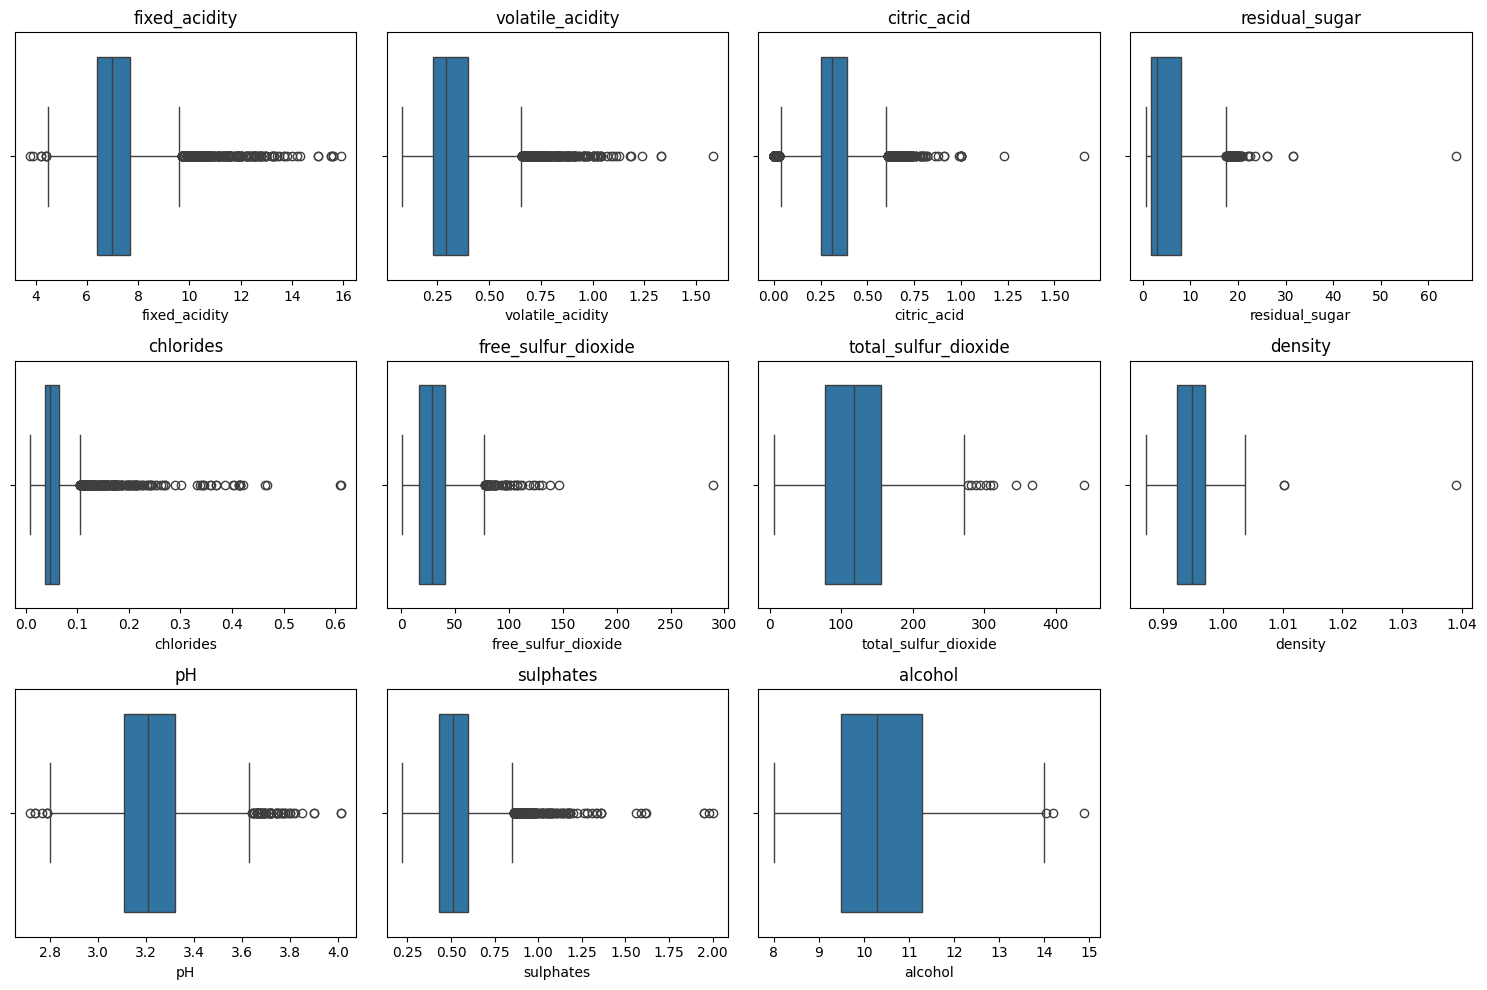

In [7]:
# Let's see if we have outlier in the dataset

plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

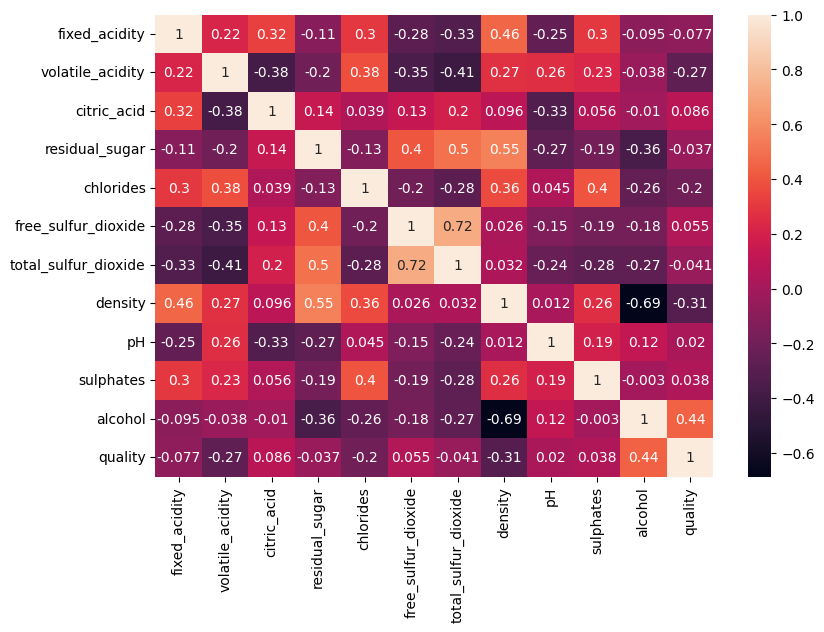

In [8]:
# Let's find correlation between the various featuers to wine quality
corr = df.corr()
plt.figure(figsize=(9,6))
sns.heatmap(corr, annot=True)
plt.show()

## Based on SNS Heatmap, let's look at the last row. It shows correlation between quality and other features. Based on it the following features have strong correlation with quality (positive or negative doesn't matter)
Alcohol: 0.44
density: -0.31
volatile_acidity: -0.27


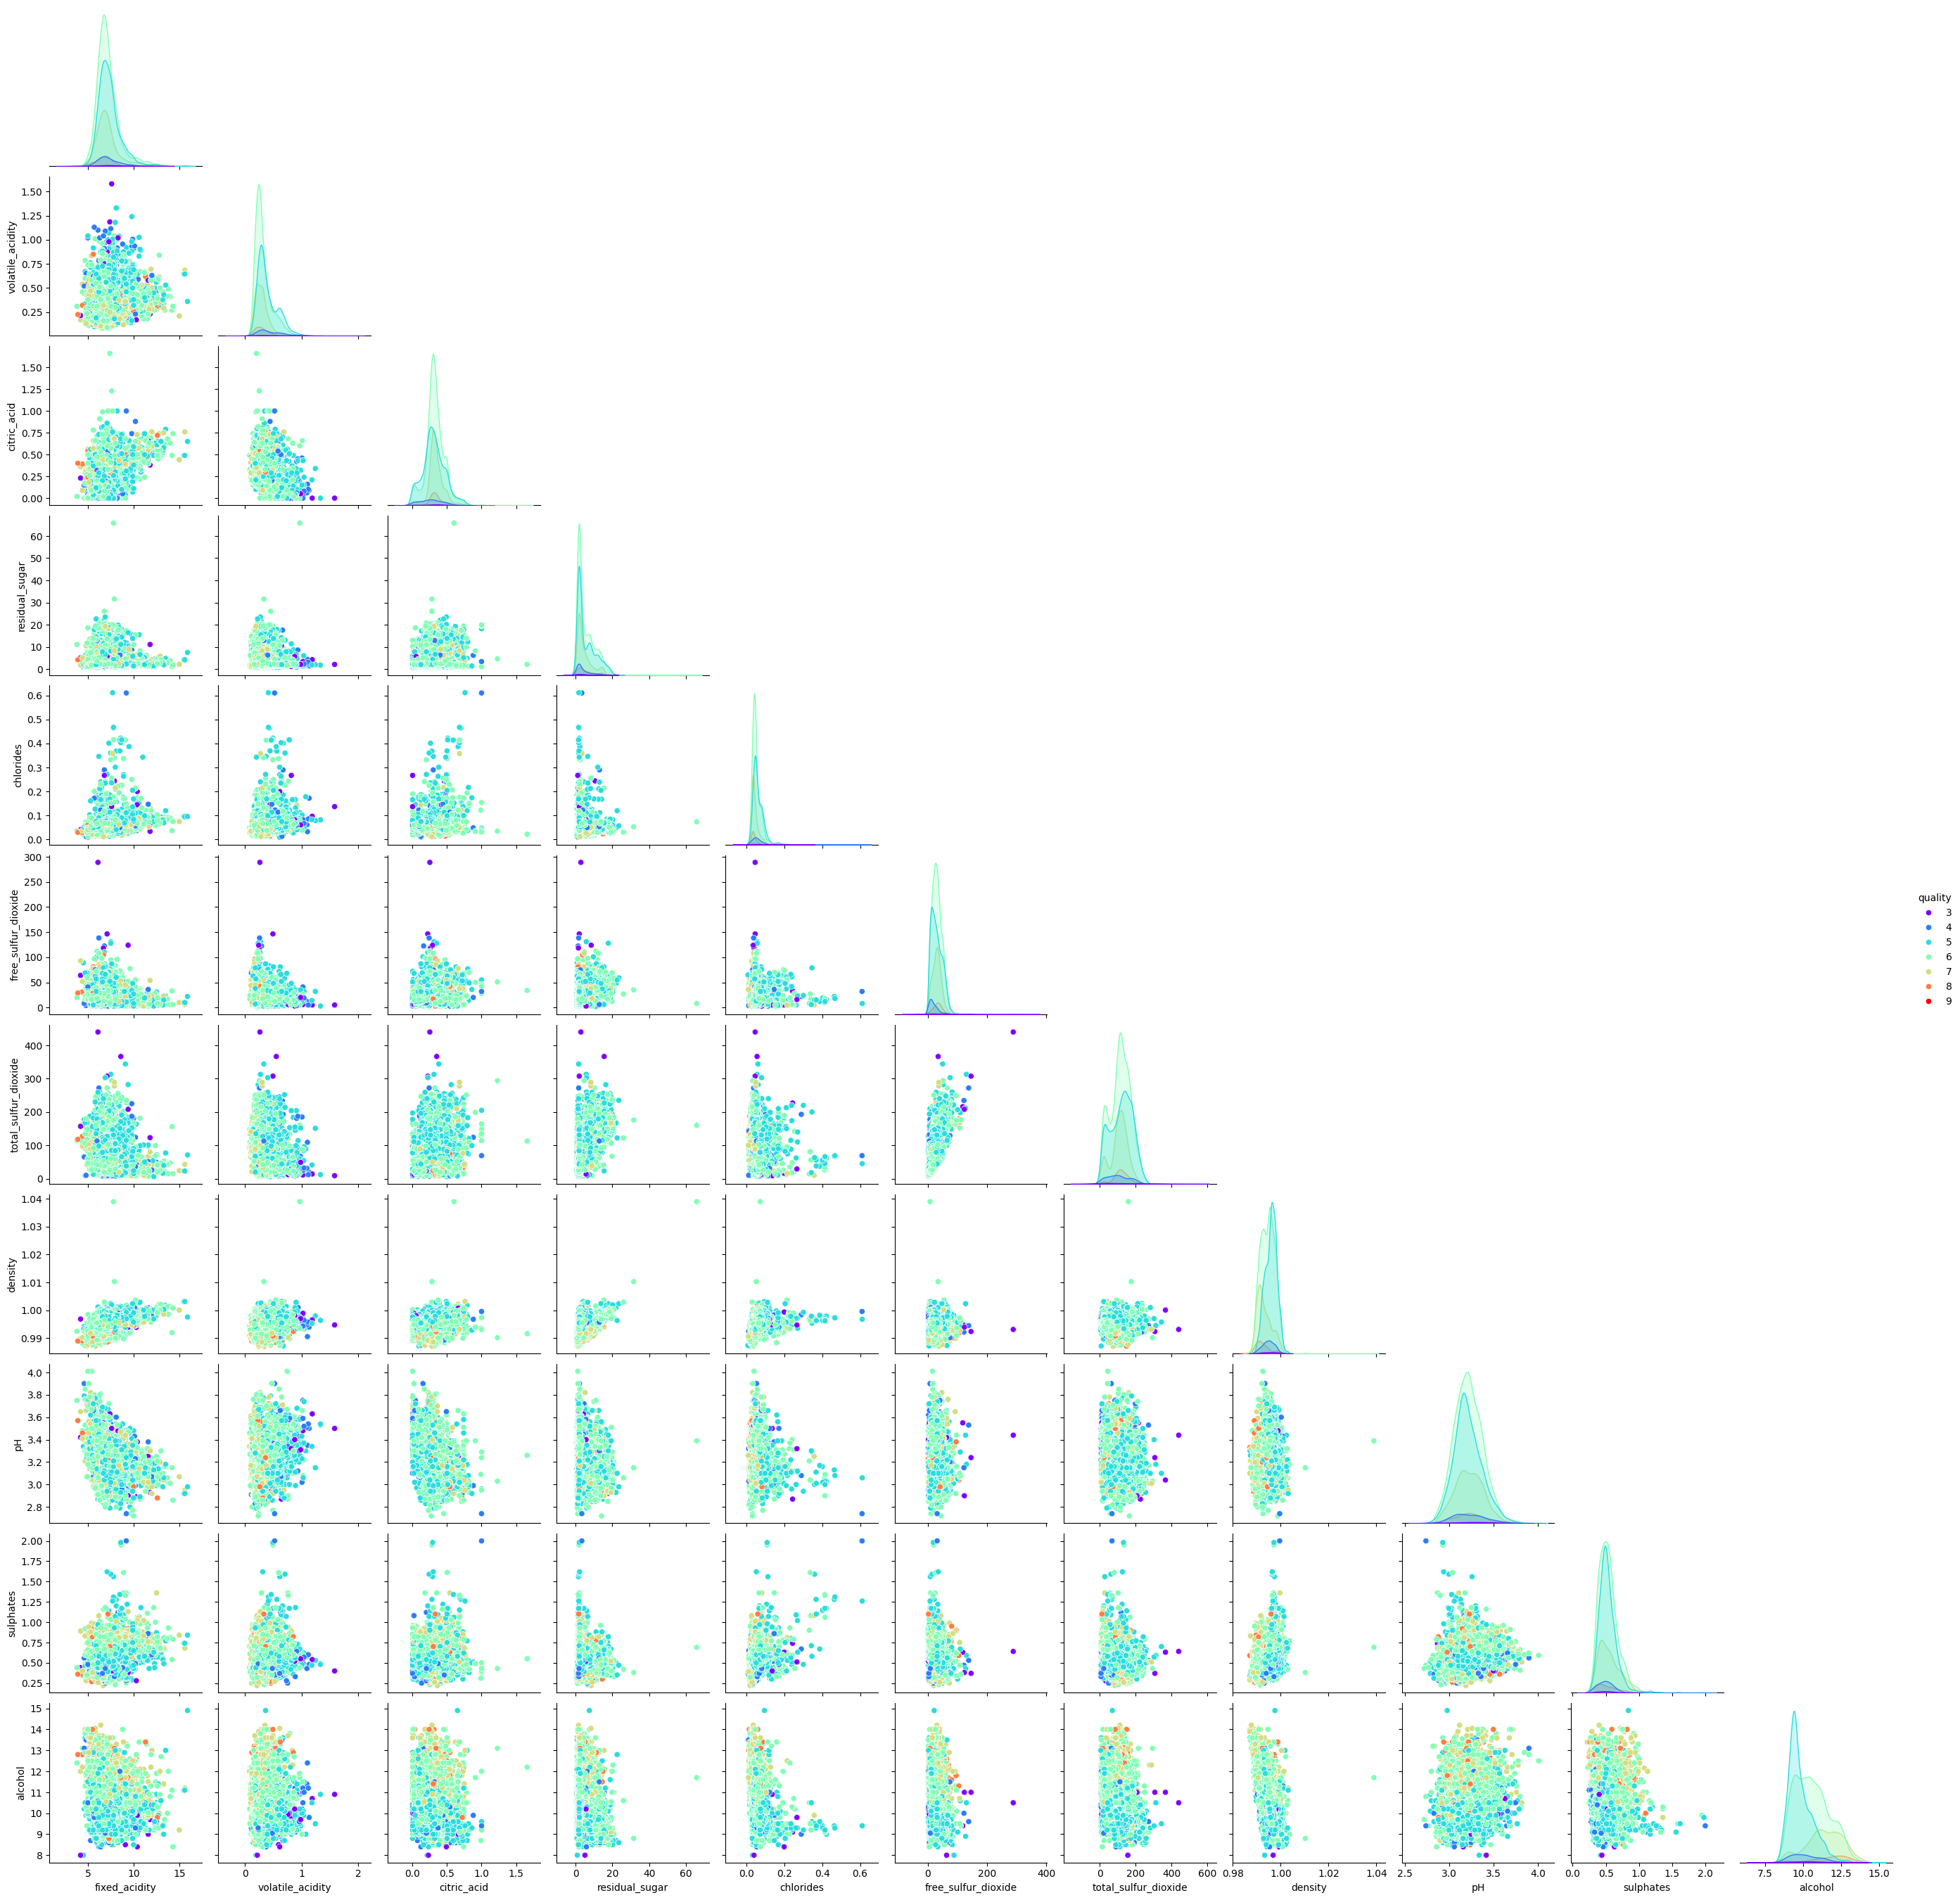

In [9]:
# Let's draw paitplots to understand the data better
sns.pairplot(df, hue='quality',corner = True, palette='rainbow')
plt.show()

In [10]:
# Target Categorizing
df.quality.value_counts()

,count
quality,
6,2836
5,2138
7,1079
4,216
8,193
3,30
9,5


In [11]:
df = df.replace({'quality': {
                        10 : 'Good',
                        9 : 'Good',
                        8 : 'Good',
                        7 : 'Good',
                        6 : 'Middle',
                        5 : 'Middle',
                        4 : 'Bad',
                        3 : 'Bad'
          }})

In [12]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,Middle
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Middle
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Middle
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Middle
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Middle


In [13]:
# Create X from DataFrame and y as Target
X_temp = df.drop(columns = 'quality')
y = df['quality']

In [14]:
# Normalize data to decrease the effect of large number
# Here use MinScaler function and range it in [0,1]

scaler = MinMaxScaler(feature_range=(0,1)).fit_transform(X_temp)
X = pd.DataFrame(scaler, columns = X_temp.columns)
X.describe().T.style.background_gradient(cmap='Greens')

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,6497.000000,0.282257,0.107143,0.000000,0.214876,0.264463,0.322314,1.000000
volatile_acidity,6497.000000,0.173111,0.109758,0.000000,0.100000,0.140000,0.213333,1.000000
citric_acid,6497.000000,0.191948,0.087541,0.000000,0.150602,0.186747,0.234940,1.000000
residual_sugar,6497.000000,0.074283,0.072972,0.000000,0.018405,0.036810,0.115031,1.000000
chlorides,6497.000000,0.078129,0.058195,0.000000,0.048173,0.063123,0.093023,1.000000
free_sulfur_dioxide,6497.000000,0.102518,0.061630,0.000000,0.055556,0.097222,0.138889,1.000000
total_sulfur_dioxide,6497.000000,0.252868,0.130235,0.000000,0.163594,0.258065,0.345622,1.000000
density,6497.000000,0.146262,0.057811,0.000000,0.100829,0.149990,0.190476,1.000000
pH,6497.000000,0.386435,0.124641,0.000000,0.302326,0.379845,0.465116,1.000000
sulphates,6497.000000,0.174870,0.083599,0.000000,0.117978,0.162921,0.213483,1.000000


In [15]:
# Let's do Modelling
# define a function to plot Confusion Matrix
def plot_confusion_matrix(y_test, y_prediction):
  cm = metrics.confusion_matrix(y_test, y_prediction)
  ax = plt.subplot()
  ax = sns.heatmap(cm, annot=True, fmt='', cmap='Purples')
  ax.set_xlabel('Predicted labels', fontsize=15)
  ax.set_ylabel('True Labels', fontsize=15)
  ax.set_title('Confusion Matrix', fontsize=25)
  ax.xaxis.set_ticklabels(['Bad','Good','Middle'])
  ax.yaxis.set_ticklabels(['Bad','Good','Middle'])
  plt.show()



In [16]:
# Define a function to plotting Classification report
def clfr_plot(y_test, y_pred):
  cr = pd.DataFrame(metrics.classification_report(y_test, y_pred_rf, digits=3, output_dict=True)).T
  cr.drop(columns='support', inplace=True)
  sns.heatmap(cr, cmap='Purples', annot=True, linecolor='white', linewidths=0.5).xaxis.tick_top()

In [17]:
def clf_plot(y_pred) :
    '''
    1) Ploting Confusion Matrix
    2) Plotting Classification Report'''
    cm = metrics.confusion_matrix(y_test, y_pred)
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3, output_dict=True)).T
    cr.drop(columns='support', inplace=True)

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    # Left AX : Confusion Matrix
    ax[0] = sns.heatmap(cm, annot=True, fmt='', cmap="Purples", ax=ax[0])
    ax[0].set_xlabel('Prediced labels', fontsize=18)
    ax[0].set_ylabel('True labels', fontsize=18)
    ax[0].set_title('Confusion Matrix', fontsize=25)
    ax[0].xaxis.set_ticklabels(['Bad', 'Good', 'Middle'])
    ax[0].yaxis.set_ticklabels(['Bad', 'Good', 'Middle'])

    # Right AX : Classification Report
    ax[1] = sns.heatmap(cr, cmap='Purples', annot=True, linecolor='white', linewidths=0.5, ax=ax[1])
    ax[1].xaxis.tick_top()
    ax[1].set_title('Classification Report', fontsize=25)
    plt.show()

In [18]:
df.quality.value_counts()

,count
quality,
Middle,4974
Good,1277
Bad,246


In [19]:
# Remove rows with quality '9' and convert categorical quality values to numerical representations
df = df[df['quality'] != '9'].copy()
df['quality'] = df['quality'].map({'Bad': 0, 'Middle': 1, 'Good': 2})
y = df['quality'] # Update y to the numerically mapped quality column

# Split Data Frame
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest Classifier


In [20]:
# dictionary parameters to test in algorithm
parameters = {
    'n_estimators': [10,20,40],
    'criterion' : ['gini','entropy','log_loss'],
    'max_features': ['sqrt','log2']
}

rf = RandomForestClassifier()
rf_cv = GridSearchCV(estimator=rf, cv=20, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters: ', rf_cv.best_params_)
print('accuracy: ', rf_cv.best_score_)

Tuned hyper parameters:  {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 40}
accuracy:  0.8574198099198101


In [21]:
# Model: Use the tuned paramters in RandomForestClassifier

rf = RandomForestClassifier(**rf_cv.best_params_).fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
rf_score = round(rf.score(X_test, y_test),3)
print('RandomForestClassifier score: ', rf_score)

RandomForestClassifier score:  0.846


In [22]:
y_test.value_counts()

,count
quality,
1,999
2,253
0,48


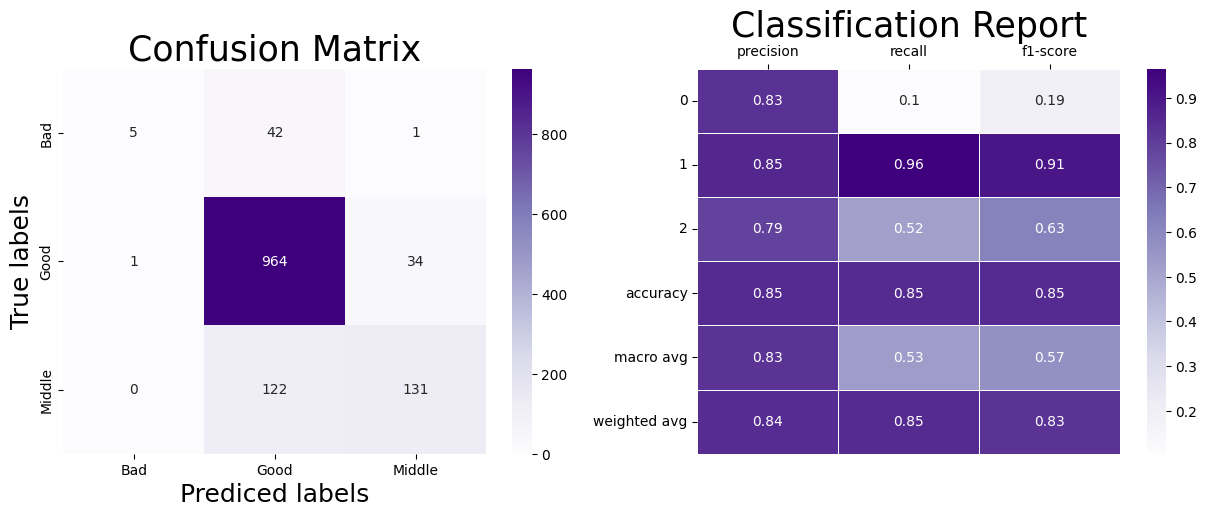

In [23]:
clf_plot(y_pred_rf)

## Logisitic Regression

In [38]:
# let's define parameters to test in the algorithm
# Create a pipeline for Scaling the data and then using Logisitic Regression. Otherwise it complains about max_iter was reached which means that
# coef did not converge

# pipeline = Pipeline([
#     ('scaler',StandardScaler()),
#     ('lr',LogisticRegression(max_iter=1000))
# ])
parameters = {
    'C': [0.001,0.01,0.1,1.0,10,100,1000],
    'class_weight': ['balanced'],
    'solver' : ['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']
}

lr = LogisticRegression()
lr_cv = GridSearchCV(estimator=pipeline, param_grid = parameters, cv=10).fit(X_train, y_train)

print('Tuned Hyper Paramters: ', lr_cv.best_params_)
print('accuracy: ', lr_cv.best_score_)

y_train dtype: int64
y_train unique values: [1 2 0]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

KeyboardInterrupt: 

In [25]:
lr = LogisticRegression(**lr_cv.best_params_).fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_score= round(lr.score(X_test, y_test),3)
print('Logistic Regression score: ', lr_score)


Logistic Regression score:  0.768


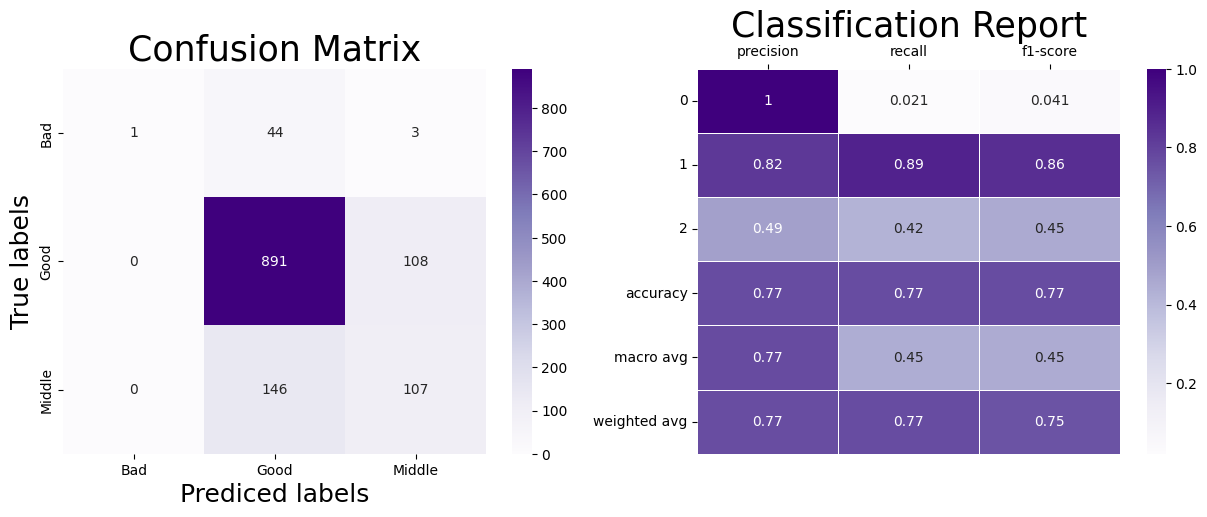

In [26]:
clf_plot(y_pred_lr)

## Support Vector Machines


In [28]:
# a dictionary to degine parameters in the test algorithm
parameters  = {
    'C' : [0.1, 1, 10],
    'gamma' : [0.01, 0.1, 1]
}

svc = SVC()
svc_cv = GridSearchCV(estimator = svc, param_grid = parameters, cv=3).fit(X_train, y_train)
print('Tuned Hyper Parameters: ', svc_cv.best_params_)
print('accuracy:', svc_cv.best_score_)

Tuned Hyper Parameters:  {'C': 10, 'gamma': 1}
accuracy: 0.7869933683285159


In [30]:
# Model. Use the tuned Hyperparameters
svc = SVC(**svc_cv.best_params_).fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
svc_score = round(svc.score(X_test, y_test),3)
print('Support vector machines score: ', svc_score)

Support vector machines score:  0.792


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


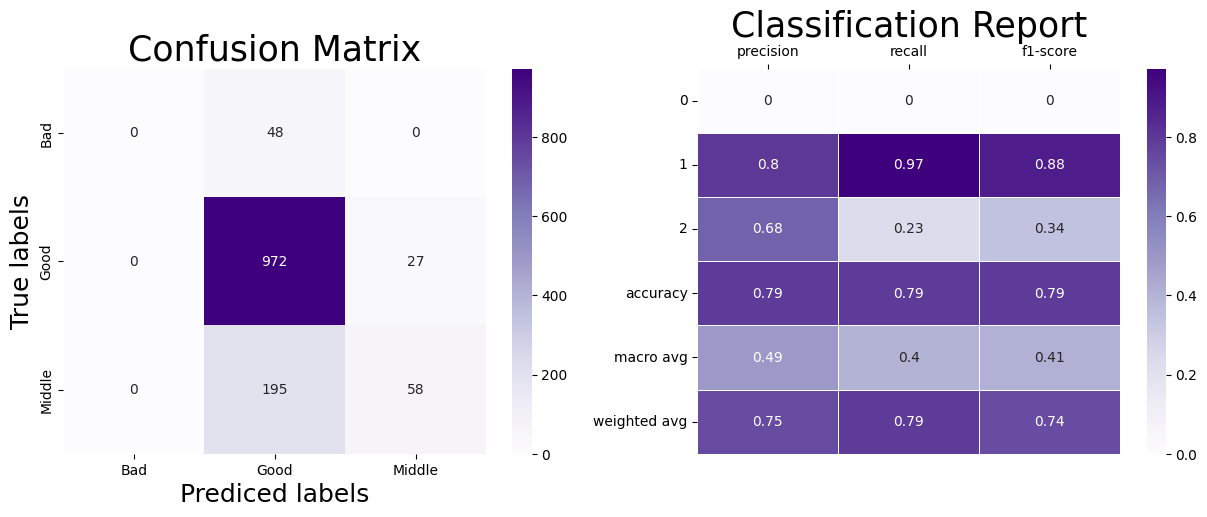

In [32]:
clf_plot(y_pred_svc);

## Decision Tree Classifier

In [39]:
parameters = {
    'criterion': ['gini','entropy','log_loss'],
    'splitter' : ['best','random'],
    'max_depth' : list(np.arange(4,30,1))
}


In [40]:
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(estimator = tree, param_grid = parameters, cv =3).fit(X_train, y_train)
print('Tuned Hyper Parameters: ', tree_cv.best_params_)
print('accuracy: ', tree_cv.best_score_)

Tuned Hyper Parameters:  {'criterion': 'gini', 'max_depth': np.int64(7), 'splitter': 'best'}
accuracy:  0.7971926338650132


In [41]:
tree = DecisionTreeClassifier(**tree_cv.best_params_).fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
tree_score = round(tree.score(X_test, y_test),3)
print('Decision Tree Classifier Score: ', tree_score)


Decision Tree Classifier Score:  0.788


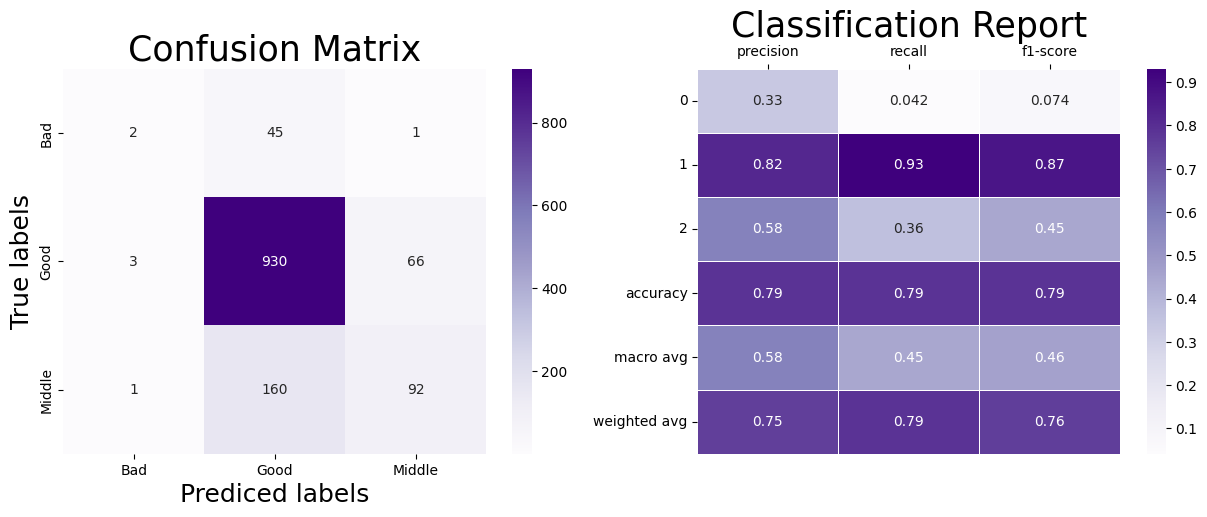

In [42]:
clf_plot(y_pred_tree)

## K Neighbors Classifier

In [44]:
parameters = {
    'n_neighbors' : list(np.arange(3,50,2)),
    'weights' : ['uniform', 'distance'],
    'p' : [1,2,3,4]
}

In [46]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator = knn, param_grid = parameters, cv = 3).fit(X_train, y_train)
print('Tuned Hyper Parameters: ', knn_cv.best_params_)
print('accuracy: ', knn_cv.best_score_)

Tuned Hyper Parameters:  {'n_neighbors': np.int64(49), 'p': 4, 'weights': 'distance'}
accuracy:  0.8349054068400967


In [47]:
knn = KNeighborsClassifier(**knn_cv.best_params_).fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_score = round(knn.score(X_test, y_test),3)
print('K Neighbors Classification score: ', knn_score)

K Neighbors Classification score:  0.846


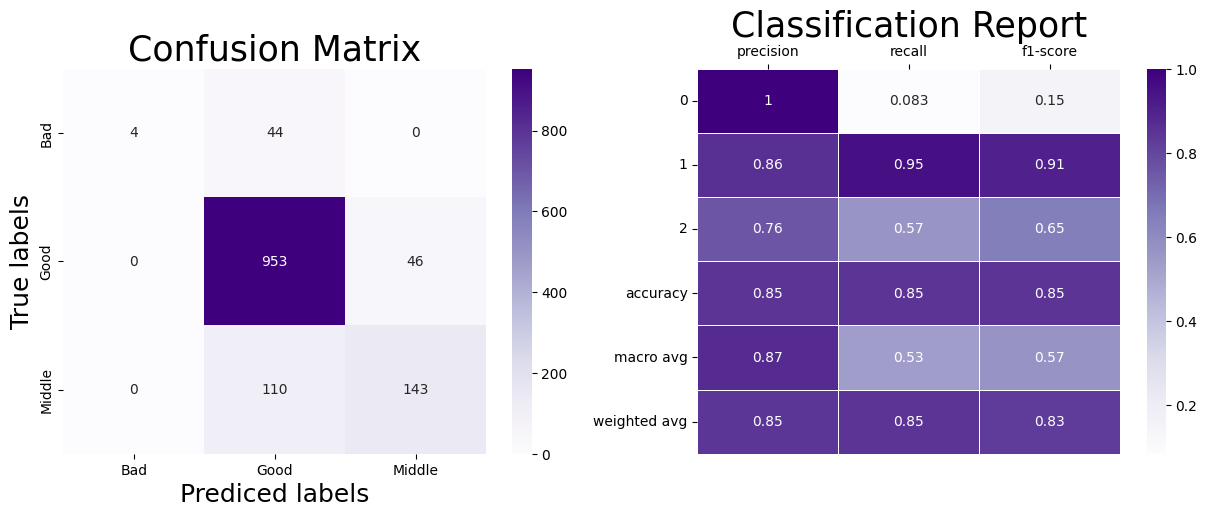

In [48]:
clf_plot(y_pred_knn)

## Gaussian NB

In [49]:
gnb = GaussianNB().fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
gnb_score = round(gnb.score(X_test, y_test),3)
print('GNB Score: ', gnb_score)

GNB Score:  0.729


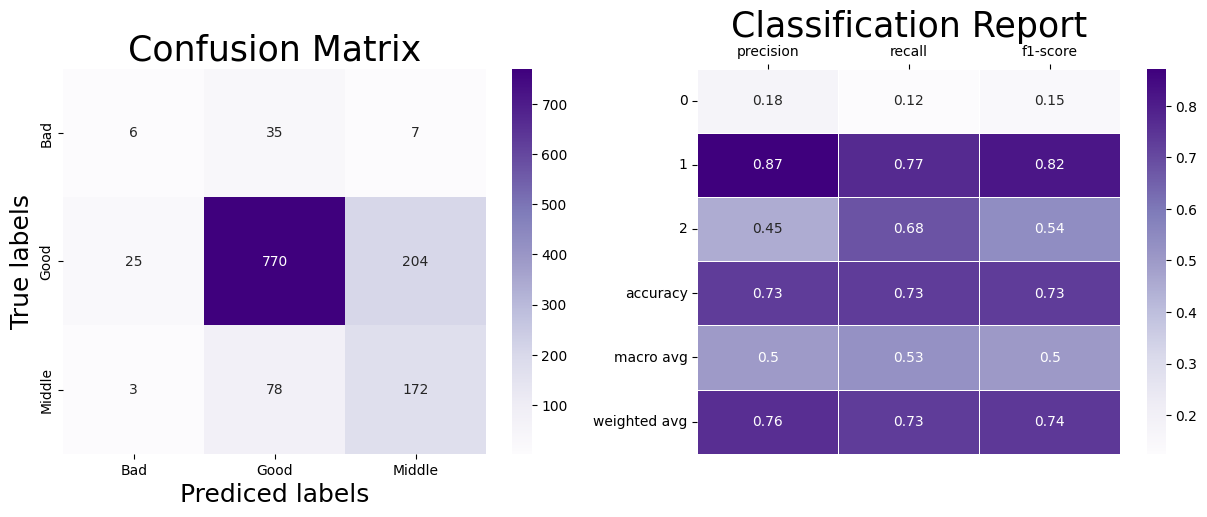

In [50]:
clf_plot(y_pred_gnb)

## Result

In [51]:
result = pd.DataFrame({
    'Algorithm' : ['RandomForestClassifier', 'LogisticRegression', 'SVC', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'GaussianNB'],
    'Score' : [rf_score, lr_score, svc_score, tree_score, knn_score, gnb_score]
})

result.sort_values(by='Score', inplace=True)

In [52]:
sns.set_palette("Purples")

/tmp/ipython-input-1562011080.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=result.Algorithm, rotation=300)


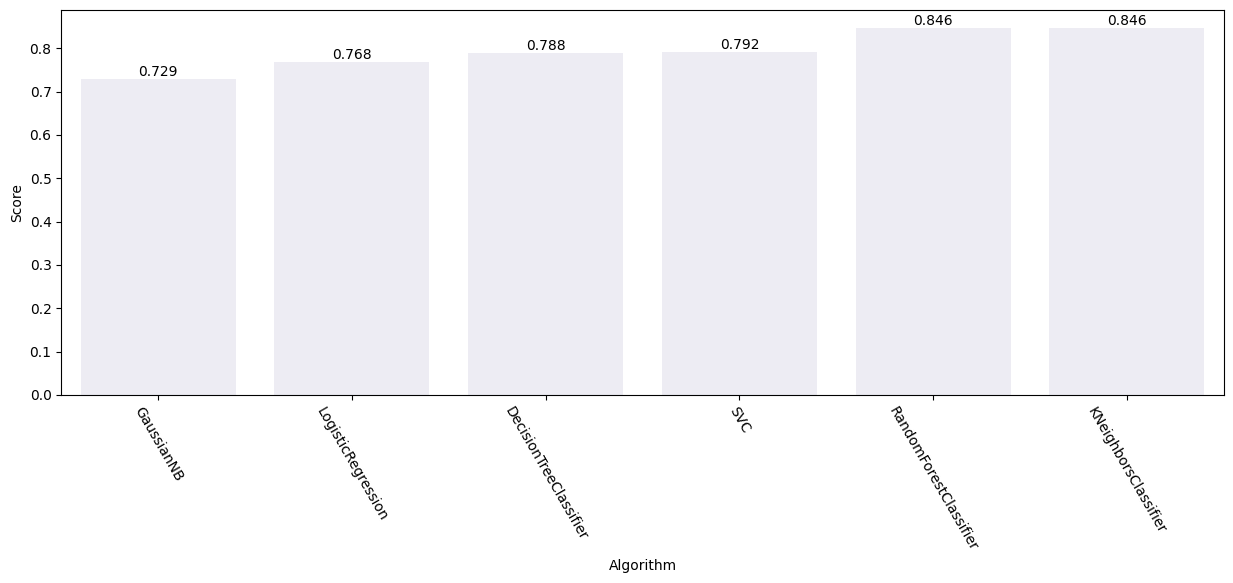

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.barplot(x='Algorithm', y='Score', data=result)
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(labels=result.Algorithm, rotation=300)
plt.show()

## Results
Based on the above plots, we use KNeighborsClassifier